# Q2: Laptop Prices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Read dataset

In [2]:
laptop_df = pd.read_csv('laptop_price.csv')
laptop_df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [3]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

Note: no null data entries

2. Plot the price of all the laptops

In [4]:
# In order to ensure consistency in product and brand names, we can standardize the 'Company' and 'Product' columns by stripping leading/trailing spaces and converting to title case.
laptop_df['Company'] = laptop_df['Company'].str.strip().str.title()
laptop_df['Product'] = laptop_df['Product'].str.strip().str.title()

# Convert commas to dot in 'Product' and remove trailing " 
laptop_df['Product'] = laptop_df['Product'].str.replace(',', '.').str.replace(r'\s*".*$', '', regex=True)

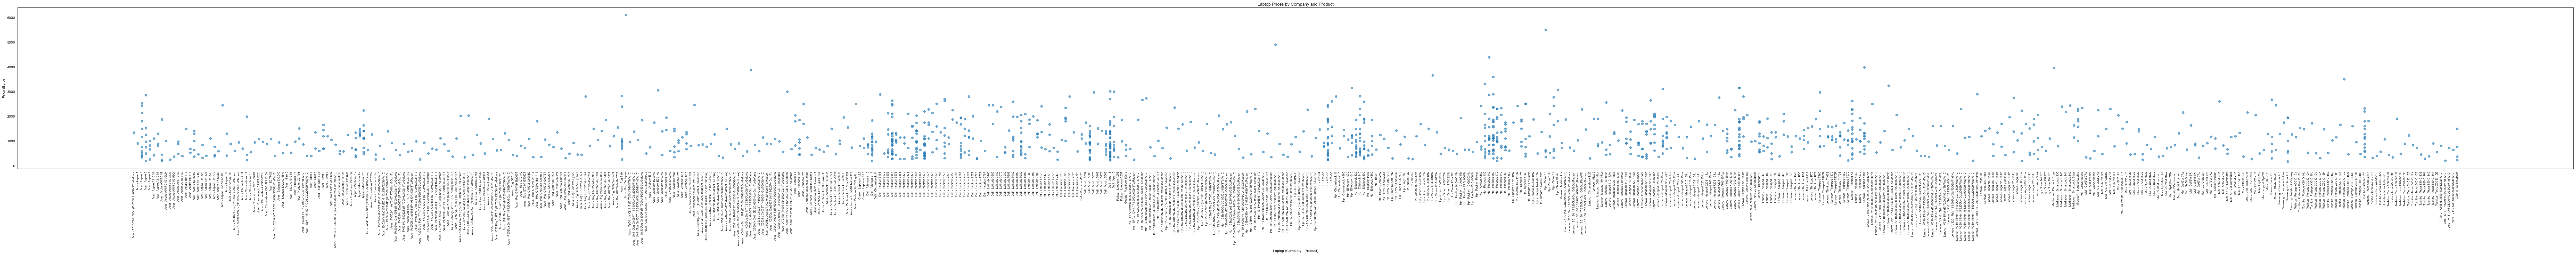

In [5]:
sns.set_style("white")

# Plot prices of all laptops
plt.figure(figsize=(100, 10))
# X axis: combination of Brand and Product for better distinction sorted in alphabetical order
laptop_labels = laptop_df['Company'] + ' - ' + laptop_df['Product']
plt.scatter(sorted(laptop_labels), laptop_df['Price (Euro)'], alpha=0.6, color="#1f77b4",)
# Increase x-axis spacing for better readability
plt.xticks(rotation=90, fontsize=8)
plt.title('Laptop Prices by Company and Product')
plt.xlabel('Laptop (Company - Product)')
plt.ylabel('Price (Euro)')
plt.tight_layout()
plt.show()

Note: The X-axis is a combination of Company - Product, which makes sense, while this will show the range of prices for different configurations of the same model.

3. Which company has on average the most expensive laptop? What is the average
laptop price for each company?

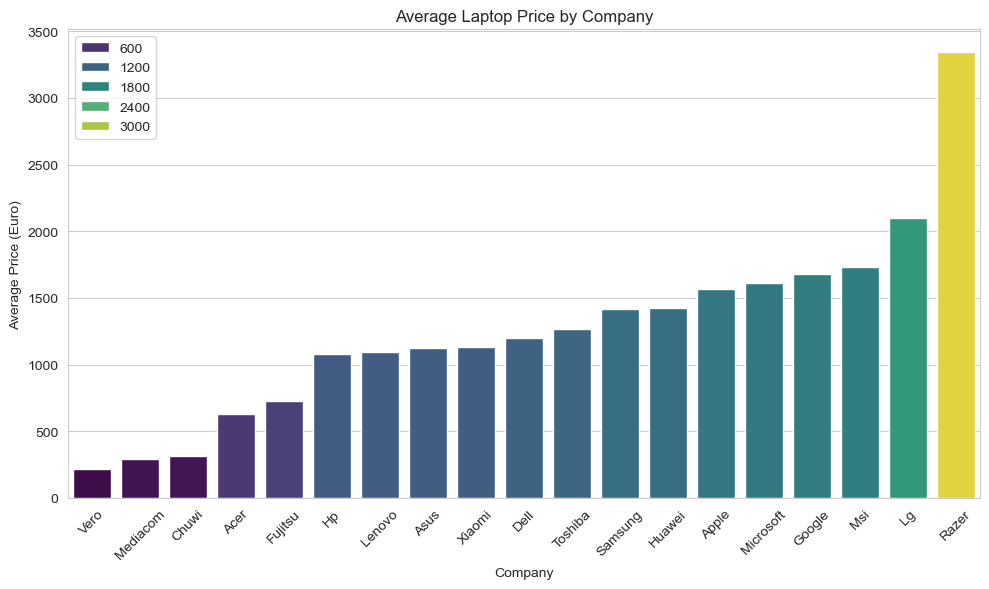

In [6]:
avg_price_by_company = laptop_df.groupby('Company')['Price (Euro)'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x=avg_price_by_company.index, y=avg_price_by_company.values, palette="viridis", hue=avg_price_by_company.values)
plt.title('Average Laptop Price by Company')
plt.xlabel('Company')
plt.ylabel('Average Price (Euro)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

According to the plot, Razer branded laptops have the highest average price, being the most expensive

4. Find the different types of Operating systems present in the data - under the
column name "OpSys".

In [7]:
laptop_df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [8]:
# Updating various OS entries into broader categories
def categorize_os(os):
    if 'Windows 10' in os or 'Windows 7' in os:
        return 'Windows'
    elif 'Mac' in os or 'macOS' in os:
        return 'MacOS'
    else:
        return os

laptop_df['OpSys'] = laptop_df['OpSys'].apply(categorize_os)

In [9]:
laptop_df['OpSys'].unique()

array(['MacOS', 'No OS', 'Windows', 'Linux', 'Android', 'Chrome OS'],
      dtype=object)

5. Plot for each of the operating system types the distribution of the prices, so that
the number of plots equals to the number of unique operating systems.

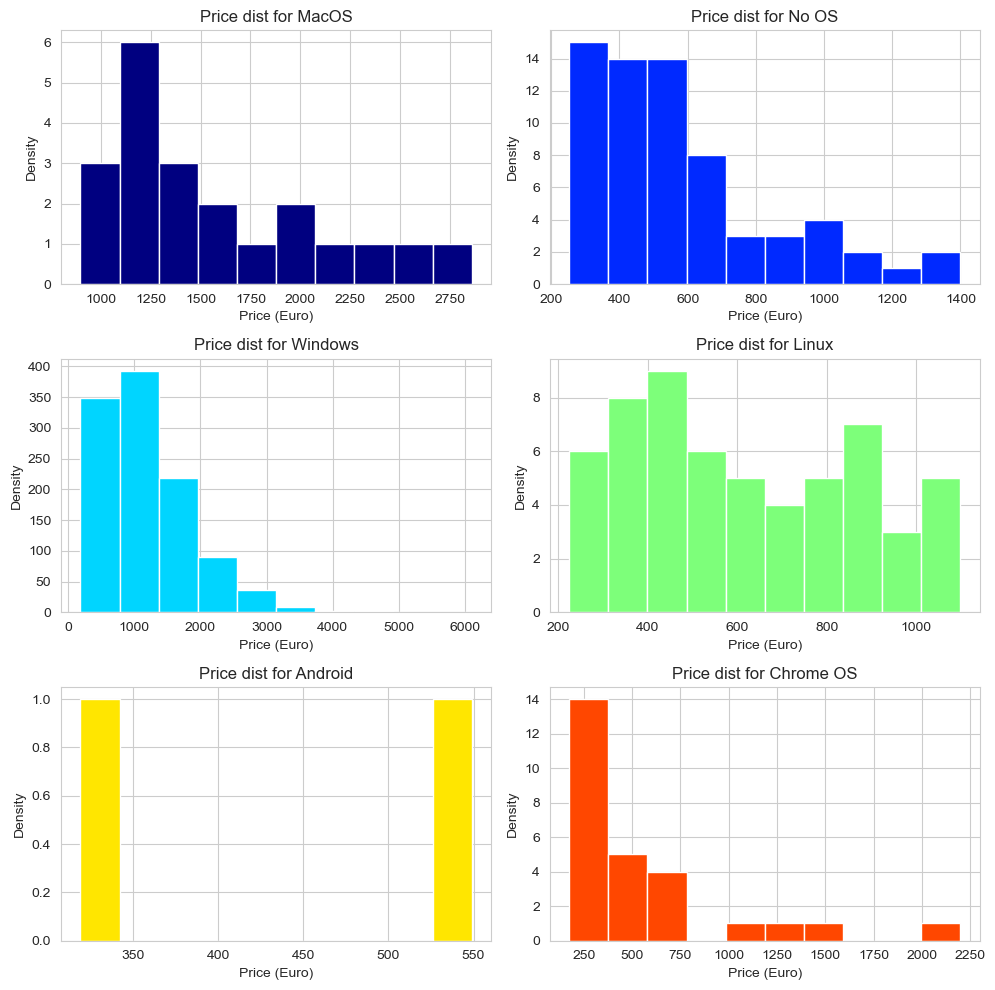

In [10]:
plt.figure(figsize=(10, 10))

num_os = len(laptop_df['OpSys'].unique())
for i, os in enumerate(laptop_df['OpSys'].unique(), 1):
    plt.subplot(3, 2, i)
    plt.hist(laptop_df[laptop_df['OpSys'] == os]['Price (Euro)'], color=plt.cm.jet((i-1)/num_os))
    plt.title(f'Price dist for {os}')
    plt.xlabel('Price (Euro)')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

6. What is the relationship between RAM and computer price? add an adequate plot to support your findings. (check data for outliers, what would be considered as an outlier? How will you detect it would you?)

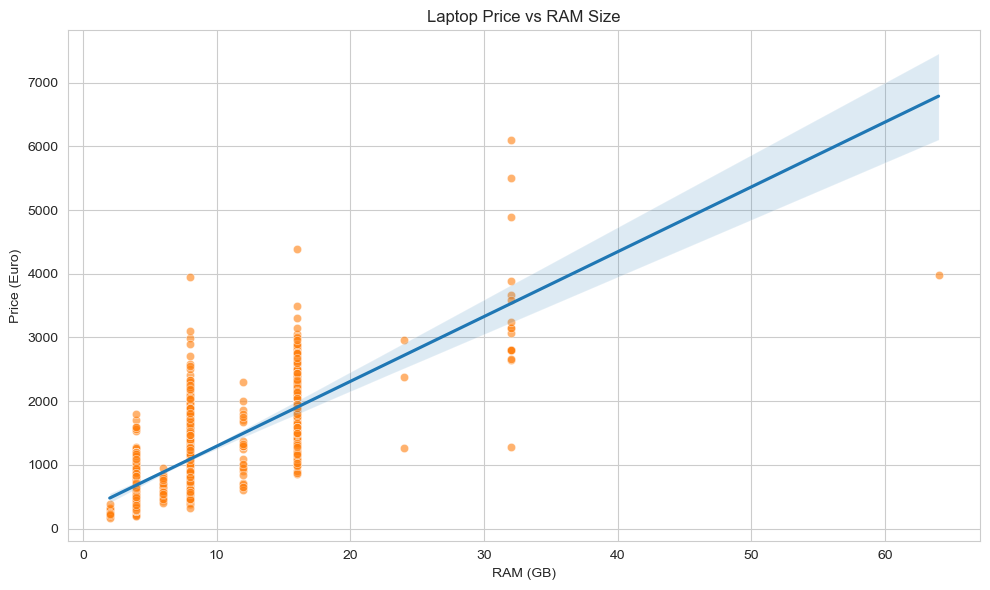

In [11]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.scatterplot(x=laptop_df['RAM (GB)'], y=laptop_df['Price (Euro)'], alpha=0.6, color="#ff7f0e")
sns.regplot(x=laptop_df['RAM (GB)'], y=laptop_df['Price (Euro)'], scatter=False, color="#1f77b4")
plt.title('Laptop Price vs RAM Size')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.tight_layout()
plt.show()

- According to the regression plot, the general trend is that, the price of the laptop has a linear relationship to amount of system ram, and looking closer at the regresssion plot you can see that the influence of the ouliers are higher in higher RAM capacities.

In [12]:
laptop_df['RAM (GB)'].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64])

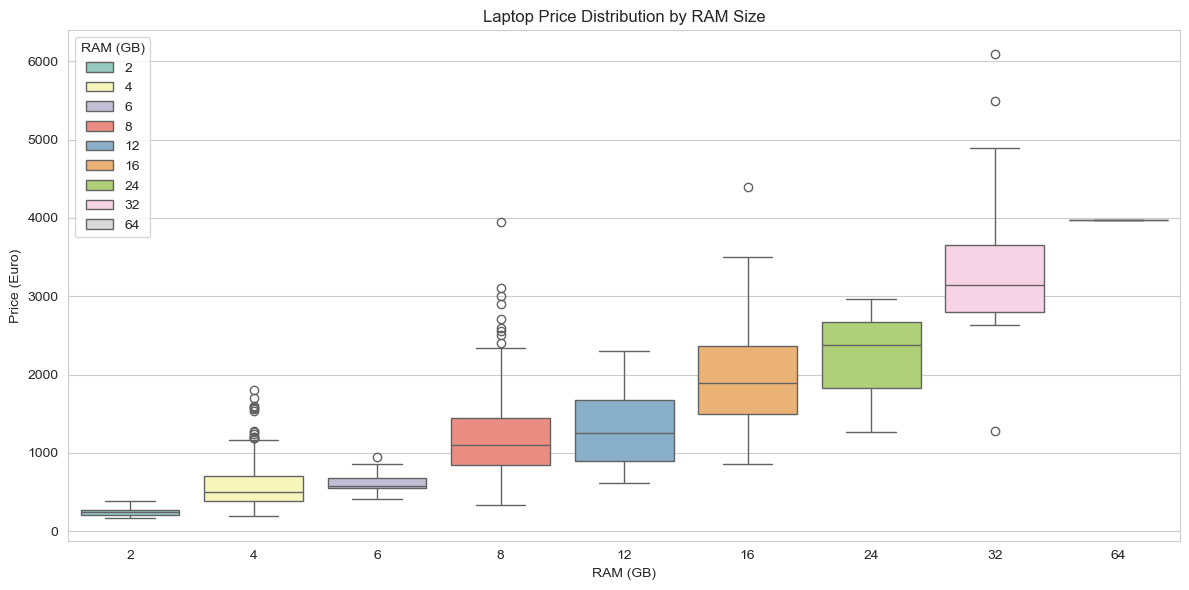

In [13]:
# boxplot for RAM vs Price for unique RAM values
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.boxplot(x='RAM (GB)', y='Price (Euro)', data=laptop_df, palette="Set3", hue='RAM (GB)')
plt.title('Laptop Price Distribution by RAM Size')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.tight_layout()
plt.show()

- Usually outliers, represent unusually high data values that are typically beyond 1.5 times the Interquartile Range (IQR) above the third quartile (Q3). By plotting a box plot for unique RAM values vs. device price we can visualize the distribution of each catagory and the whiskers represent the upper (or lower) extremities of each catagory. Which helps us in identifying outliers.

7. Create a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory".

In [14]:
laptop_df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [15]:
def memory_type(mem):
    # Both Hybrid and combinations of SSD and HDD are categorized as Hybrid
    if 'Hybrid' in mem or ('SSD' in mem and 'HDD' in mem):
        return 'Hybrid'
    elif 'SSD' in mem:
        return 'SSD'
    elif 'HDD' in mem:
        return 'HDD'
    elif 'Flash Storage' in mem:
        return 'Flash Storage'
    else:
        return 'Other'

# Creating a new column 'Storage_Type' based on 'Memory' column
laptop_df['Storage_Type'] = laptop_df['Memory'].apply(memory_type)

In [16]:
laptop_df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Storage_Type
0,Apple,Macbook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,MacOS,1.37,1339.69,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,MacOS,1.34,898.94,Flash Storage
2,Hp,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,SSD
3,Apple,Macbook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,MacOS,1.83,2537.45,SSD
4,Apple,Macbook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,MacOS,1.37,1803.60,SSD
